**Benji Andrews x Azalea Yunus**

Fall 2020

CS343: Neural Networks

Project 4: Transfer Learning

In [2]:
import os
import random
import time
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import load_stl10_dataset
import preprocess_data

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=3)
rgen = np.random.RandomState(1)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

## TensorFlow install test

*Sanity check that Tensorflow is installed correctly:*

Executing the following cell should return 3 

In [3]:
tf.print(tf.reduce_sum([tf.Variable(1), tf.Variable(2)]))

3


## Task 1: Implement ConvNet4 in TensorFlow

You will construct the familar ConvNet4 neural network architecture from last project in TensorFlow's high level `Keras::Sequential` API. Also like your last project, you will train and test on the STL-10 dataset.

### 1a. Use the high level `Keras::Sequential` API in Tensorflow 2 to implement the architecture of ConvNet4 from the last project. Train and test your network on the STL-10 dataset. 

Recall the `Keras::Sequential` common worflow:

- Build structure of network with `keras::Sequential`.
- Compile network with your choice of optimizer, loss, and metrics.
- Fit the model (remembering to pass in the appropriate training and validation sets). This results a history object that can be used to examine training/validation accuracy and loss.
- Evaluate the model on the test set. This returns test loss and accuracy.

#### Notes

- You should use the usual STL-10 data acquistion and preprocessing code from your last project.
- You don't need to do a hyperparameter search. Values that worked on the CNN project should get you in the ballpark here. The goal is to show that you know how to put together a `keras::Sequential` model and have it work successfully.
- TensorFlow needs the RGB color channel AFTER the spatial dimensions. For example: (64, 64, 3), not (3, 64, 64). You may therefore need to slightly modify the preprocesssing pipeline for this project.

#### Helpful documentation

These documentation pages should be helpful:
- https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
- https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile
- https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate
- https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit
- https://www.tensorflow.org/api_docs/python/tf/keras/Model#summary

In [4]:
# import and preprocess STL-10 data, resize to 32x32?
load_stl10_dataset.purge_cached_dataset()
x_train, y_train, x_test, y_test, x_val, y_val, x_dev, y_dev = preprocess_data.load_stl10(
    n_train_samps=4578, n_test_samps=400, n_valid_samps=2, n_dev_samps=20, scale_fact=3)

print ('Train data shape: ', x_train.shape)
print ('Train labels shape: ', y_train.shape)
print ('Test data shape: ', x_test.shape)
print ('Test labels shape: ', y_test.shape)
print ('Validation data shape: ', x_val.shape)
print ('Validation labels shape: ', y_val.shape)
print ('dev data shape: ', x_dev.shape)
print ('dev labels shape: ', y_dev.shape)

Images are: (5000, 96, 96, 3)
Labels are: (5000,)
Resizing 5000 images to 32x32...Done!
Saving Numpy arrays the images and labels to ./numpy...Done!
Train data shape:  (4578, 32, 32, 3)
Train labels shape:  (4578,)
Test data shape:  (400, 32, 32, 3)
Test labels shape:  (400,)
Validation data shape:  (2, 32, 32, 3)
Validation labels shape:  (2,)
dev data shape:  (20, 32, 32, 3)
dev labels shape:  (20,)


In [5]:
# set hyperparameters
num_filters = 10
num_dense_1 = 25
num_dense_2 = 25

# build network
net = tf.keras.Sequential()
# print("Shape of training data:", x_train.shape)

# flat layer
flat = tf.keras.layers.Flatten()

# add first layer, help from https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D
first_layer = tf.keras.layers.Conv2D(filters=num_filters, kernel_size=x_train.shape[1], input_shape=x_train.shape[1:], activation='relu', kernel_regularizer=tf.keras.regularizers.l2(5e-3), bias_regularizer=tf.keras.regularizers.l2(5e-3))
net.add(first_layer)

# add second layer, help from https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D
second_layer = tf.keras.layers.MaxPooling2D(pool_size=(1,1))
net.add(second_layer)
net.add(flat)

# add third layer, help from https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
third_layer = tf.keras.layers.Dense(units=num_dense_1, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(5e-3), bias_regularizer=tf.keras.regularizers.l2(5e-3))
net.add(third_layer)
net.add(flat)

# add fourth layer, help from https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
fourth_layer = tf.keras.layers.Dense(units=num_dense_2, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(5e-3), bias_regularizer=tf.keras.regularizers.l2(5e-3))
net.add(fourth_layer)

# get summary of network
# net.summary()

In [6]:
# compile network using learning rate from last project, sparse categorical for integer classes
adam = tf.optimizers.Adam(lr=1e-2)
net.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# fit network on training and validation sets using hyperparameters from last project, record runtime
start = time.time()
hist = net.fit(x_train, y_train, batch_size=5, epochs=250, validation_data=(x_val, y_val))
runtime = time.time() - start

# evaluate network on test set
loss, acc = net.evaluate(x_test, y_test)
print(f'Accuracy: {acc}, Loss: {loss}')

Epoch 1/250
916/916 [==============================] - 1s 1ms/step - loss: 2.4763 - accuracy: 0.1206 - val_loss: 2.3912 - val_accuracy: 0.0000e+00
Epoch 2/250
916/916 [==============================] - 1s 772us/step - loss: 2.4037 - accuracy: 0.1498 - val_loss: 2.3095 - val_accuracy: 0.0000e+00
Epoch 3/250
916/916 [==============================] - 1s 1ms/step - loss: 2.4019 - accuracy: 0.1468 - val_loss: 2.5260 - val_accuracy: 0.0000e+00
Epoch 4/250
916/916 [==============================] - 1s 778us/step - loss: 2.3911 - accuracy: 0.1470 - val_loss: 2.4911 - val_accuracy: 0.0000e+00
Epoch 5/250
916/916 [==============================] - 1s 981us/step - loss: 2.3907 - accuracy: 0.1501 - val_loss: 2.5901 - val_accuracy: 0.0000e+00
Epoch 6/250
916/916 [==============================] - 1s 928us/step - loss: 2.4188 - accuracy: 0.1538 - val_loss: 2.3799 - val_accuracy: 0.5000
Epoch 7/250
916/916 [==============================] - 1s 1ms/step - loss: 2.4066 - accuracy: 0.1494 - val_loss: 2

KeyboardInterrupt: 

In [ ]:
# print runtime
m, s = divmod(runtime, 60)
print(f"Training runtime: {m:.0f} min and {s:.0f} sec")

### 1b. Make 2 "high quality" plots showing the following

- Training and validation accuracy (y axis) over training epochs (x axis).
- Training and validation loss (y axis) over epochs (x axis).

A high quality plot consists of:
- A useful title
- X and Y axis labels
- A legend

In [ ]:
plt.plot(hist.history['accuracy'])
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
plt.plot(hist.history['loss'])
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

### 1c. Visualize predictions

Make a 5x5 grid of the first 25 images in the test dataset. Label each with the predicted class label string (English label, not an int code).

In [ ]:
classes = np.loadtxt(os.path.join('data', 'stl10_binary', 'class_names.txt'), dtype=str)
# print(classes)
predicted_classes = np.argmax(net.predict(x_test), axis=1)
# print(predicted_classes)
fig, axes = plt.subplots(5, 5, figsize=(12,12))
for r in range(5):
    for c in range(5):
        # help w/image indexing from Nhi T.
        img = x_test[5*r+c]
        axes[r,c].imshow(img)
        pred = predicted_classes[5*r+c]
        print(f"Image {5*r+c}: Predicted class is {classes[predicted_classes[5*r+c]]} and actual class is {classes[y_test[5*r+c]]}.")
        axes[r,c].set_title(classes[predicted_classes[5*r+c]])
        axes[r,c].set_xticks([])
        axes[r,c].set_yticks([])

### 1d. Questions

**Question 1:** What accuracy do you get on the STL-10 test set? Briefly summarize the hyperparameters that you used to obtain this result.

**Question 2:** How do the loss and accurary results compare to the CNN project?

**Question 3:** Identify a few misclassifications. Is there a discernable pattern?

**Answer 1:** The final loss and accuracy figures were 2.21 and 0.21 respectively. These figures were achieved with a learning rate of 1e-2, regularization strength of 5e-3, mini-batch size of 5, and number of epochs as 250 since these were the hyperparameters used for the last project.

**Answer 2:** The final loss and accuracy are both noticiably worse than those from the last project. The runtime was about half of what it was in the last project.

**Answer 3:** It seems that the images identified as 'cats' might be in a pattern of misclassification.

## Task 2: Transfer learning

Here you will use Tensorflow 2 to download the pre-trained MobileNetV2 network (you may also use another network like InceptionV3, but MobileNetV2 likely will run noticeably faster on your machine). We will use transfer learning to accelerate training to solve a novel problem: **the binary classification task of discriminating whether an image is of a hotdog or not.**

### Overview

- Remove the output layer, add a new Dense output layer.
- Freeze (disable) training on all non-output layers.
- Train the last layer on a food dataset. Assess performance. Plot some example images and their classification below.

### 2a. Download and load in hotdot image dataset

Download the **food dataset** from the project website, copy it into a `data` subfolder in your project directory.

Run the below code to load in the hot-dog-or-not dataset. Check the shapes to ensure everything is loaded in correctly. 

In [8]:
ds_base_dir = 'data/'
hotdog_train_x = np.load(os.path.join(ds_base_dir, 'train_x.npy'))
hotdog_train_y = np.load(os.path.join(ds_base_dir, 'train_y.npy'))
hotdog_test_x = np.load(os.path.join(ds_base_dir, 'test_x.npy'))
hotdog_test_y = np.load(os.path.join(ds_base_dir, 'test_y.npy'))

print(f'Training hotdog split shape: {hotdog_train_x.shape}. Should be (16000, 96, 96, 3)')
print(f'Test hotdog split shape: {hotdog_test_x.shape}. Should be (4000, 96, 96, 3)')

Training hotdog split shape: (16000, 96, 96, 3). Should be (16000, 96, 96, 3)
Test hotdog split shape: (4000, 96, 96, 3). Should be (4000, 96, 96, 3)


#### Visualize data

Write code below to view (plot) some of the images in the dataset. It is always important to look at your data!

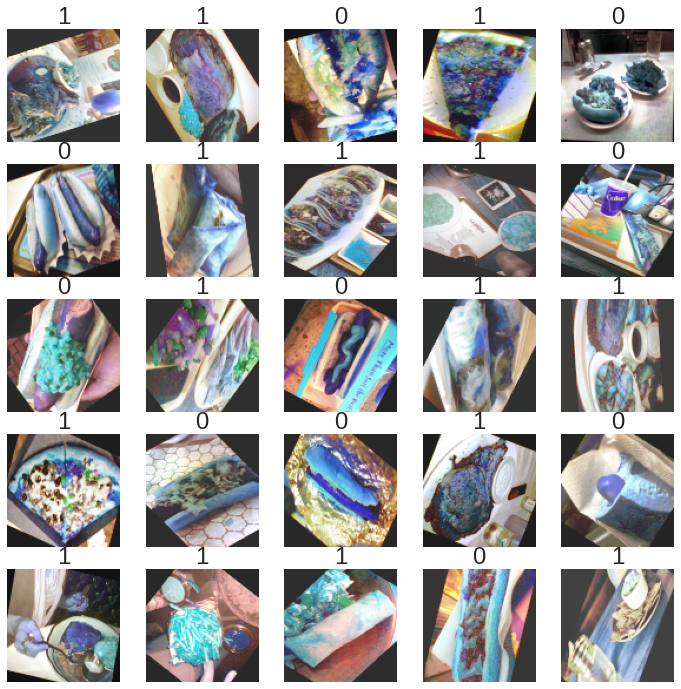

In [9]:
fig, axes = plt.subplots(5, 5, figsize=(12,12))
for r in range(5):
    for c in range(5):
        # help from Nhi T.
        axes[r,c].imshow(hotdog_train_x[5*r+c])
        axes[r,c].set_title(hotdog_train_y[5*r+c])
        axes[r,c].set_xticks([])
        axes[r,c].set_yticks([])

### 2b. Normalize hotdog dataset

Normalize the train and test dataset by standardizing both based on the training set statistics.

In [10]:
standard_hotdog_train_x = (hotdog_train_x - np.mean(hotdog_train_x)) / np.std(hotdog_train_x)
standard_hotdog_test_x = (hotdog_test_x - np.mean(hotdog_test_x)) / np.std(hotdog_test_x)

print(f'Standardized training hotdog split shape: {standard_hotdog_train_x.shape}.')
print(f'Standardized test hotdog split shape: {standard_hotdog_test_x.shape}.')

Standardized training hotdog split shape: (16000, 96, 96, 3).
Standardized test hotdog split shape: (4000, 96, 96, 3).


### 2c. Create hotdog validation set

Set aside the last 20% of the training set as the validation set

In [11]:
print("hotdog train labels shape: ",hotdog_train_y.shape)
val_bounds = int(standard_hotdog_train_x.shape[0] / 5)


hotdog_val_x = standard_hotdog_train_x[standard_hotdog_train_x.shape[0] - val_bounds:, :, :, :]
hotdog_val_y = hotdog_train_y[standard_hotdog_train_x.shape[0] - val_bounds:]

hotdog_train_y = hotdog_train_y[:standard_hotdog_train_x.shape[0] - val_bounds]
standard_hotdog_train_x = standard_hotdog_train_x[:standard_hotdog_train_x.shape[0]-val_bounds,:,:,:]


print(f'Validation hotdog split shape: {hotdog_val_x.shape}. Should be (3200, 96, 96, 3)')
print(f'Validation labels shape: {hotdog_val_y.shape}. Should be (3200,)')
print(f'Training hotdog split shape: {standard_hotdog_train_x.shape}. Should be (12800, 96, 96, 3)')
print(f'Training labels shape: {hotdog_train_y.shape}. Should be (12800,)')


hotdog train labels shape:  (16000,)
Validation hotdog split shape: (3200, 96, 96, 3). Should be (3200, 96, 96, 3)
Validation labels shape: (3200,). Should be (3200,)
Training hotdog split shape: (12800, 96, 96, 3). Should be (12800, 96, 96, 3)
Training labels shape: (12800,). Should be (12800,)


### 2d. Load in pre-trained MobileNetV2 network.

Load in a pre-trained MobileNetV2 network (look up constructor in [tf.keras.applications](https://www.tensorflow.org/api_docs/python/tf/keras/applications) or look at the tutorial from class) and set it to a variable called `model`. Remember to make the network not trainable. Calling the `summary()` method on the network object should show you a table with many rows. The top and bottom rows should be:


    input_3 (InputLayer)            [(None, 96, 96, 3)]  0                                           
    __________________________________________________________________________________________________
    out_relu (ReLU)                 (None, 3, 3, 1280)   0           Conv_1_bn[0][0]  

and you should see the following at the bottom:

    Total params: 2,257,984
    Trainable params: 0
    Non-trainable params: 2,257,984

In [12]:
# adapted from class tutorial
model = tf.keras.applications.MobileNetV2(input_shape=standard_hotdog_train_x.shape[1:], include_top=False, weights='imagenet')
model.trainable = False
model.summary()

Model: "mobilenetv2_1.00_96"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 96, 96, 3)]  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 97, 97, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 48, 48, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 48, 48, 32)   128         Conv1[0][0]                      
________________________________________________________________________________

### 2e. Create augmented model

Create a new `keras::Sequential` augmented model with an output layer that has the correct number of units to deal with the hot-dog or not problem 

Compile the augmented model with
- Adam optimizer (learning rate of 0.0001)
- binary_crossentropy loss
- accuracy metric. 

Here is the final part of the summary from the augmented model that you should get:

    Total params: 2,269,505
    Trainable params: 11,521
    Non-trainable params: 2,257,984

#### Helpful links

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam https://www.tensorflow.org/api_docs/python/tf/losses

In [14]:
# adapted from class tutorial
aug_flat = tf.keras.layers.Flatten()
aug_adam = tf.optimizers.Adam(lr=1e-4)
aug_output = tf.keras.layers.Dense(units=1, activation='relu')

aug_model = tf.keras.Sequential([model, aug_flat, aug_output])
aug_model.compile(optimizer=aug_adam, loss='binary_crossentropy', metrics=['accuracy'])
aug_model.summary()

unt_loss, unt_acc = aug_model.evaluate(hotdog_test_x, hotdog_test_y)


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_96 (Functio (None, 3, 3, 1280)        2257984   
_________________________________________________________________
flatten_2 (Flatten)          (None, 11520)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11521     
Total params: 2,269,505
Trainable params: 11,521
Non-trainable params: 2,257,984
_________________________________________________________________
125/125 [==============================] - 10s 83ms/step - loss: 6.1602 - accuracy: 0.4818


### 2f. Questions

**Question 4:** What is the accuracy and loss for the network with the untrained output layer on the test set? Explain why you got the accuracy value that you did.

**Question 5:** Briefly defend your choice of number of units in the output layer.

**Answer 4:** Evaluating the network before fitting resulted in a relatively high loss and low accuracy, as the net is not specifically tuned to our task yet.

**Answer 5:** The number of units in the output layer is 1 because this is supposed to be the dimensionality of the output space. The vector we want is 1 dimensional.

### 2g. Fit the augmented model on the hotdog training data

Setting the verbose optional parameter to 2 will give you helpful printouts of performance on the validation set as it completes every epoch of training.

#### Training goal

You should aim to achieve at least 75% accuracy on the validation set.


#### Note

If training time is taking much more than a few minutes per epoch on your computer, you could try reducing the number of data samples in train and validation. For example, by default train `N = 12800`. Try `N = 6400` instead. You could do the same for the validation set.

In [28]:
# record runtime of hot dog training
aug_start = time.time()
aug_hist = aug_model.fit(standard_hotdog_train_x, hotdog_train_y, batch_size=200, epochs=50, validation_data=(hotdog_val_x, hotdog_val_y))
aug_runtime = time.time() - aug_start




(12800,)
Epoch 1/50
64/64 [==============================] - 51s 796ms/step - loss: 1.8261 - accuracy: 0.8677 - val_loss: 1.9755 - val_accuracy: 0.8578
Epoch 2/50
64/64 [==============================] - 58s 907ms/step - loss: 1.6886 - accuracy: 0.8780 - val_loss: 1.9779 - val_accuracy: 0.8544
Epoch 3/50
64/64 [==============================] - 66s 1s/step - loss: 1.6902 - accuracy: 0.8777 - val_loss: 2.0900 - val_accuracy: 0.8459
Epoch 4/50
64/64 [==============================] - 55s 862ms/step - loss: 1.6641 - accuracy: 0.8793 - val_loss: 1.9746 - val_accuracy: 0.8562
Epoch 5/50
64/64 [==============================] - 51s 791ms/step - loss: 1.6462 - accuracy: 0.8805 - val_loss: 2.0689 - val_accuracy: 0.8500
Epoch 6/50
64/64 [==============================] - 50s 782ms/step - loss: 1.6608 - accuracy: 0.8802 - val_loss: 2.0546 - val_accuracy: 0.8525
Epoch 7/50
64/64 [==============================] - 53s 832ms/step - loss: 1.6358 - accuracy: 0.8809 - val_loss: 1.9970 - val_accuracy: 

In [42]:
# print runtime
aug_m, aug_s = divmod(aug_runtime, 60)
aug_h, aug_min = divmod(aug_m, 60)
print(f"Training runtime: {aug_h:.0f} hours, {aug_m:.0f} min and {aug_s:.0f} sec")


# print loss and accuracy
aug_loss, aug_acc = aug_model.evaluate(hotdog_test_x, hotdog_test_y)
print(f'Augmented model accuracy: {aug_acc}, Augmented model loss: {aug_loss}')

Training runtime: 0 hours, 44 min and 39 sec
125/125 [==============================] - 12s 95ms/step - loss: 2.8973 - accuracy: 0.7928
Augmented model accuracy: 0.7927500009536743, Augmented model loss: 2.8972907066345215


### 2h. Plot hotdog results

Produce 2 high quality plots showing the following:

- Training and validation loss over epoch.
- Training and validation accuracy over epoch.

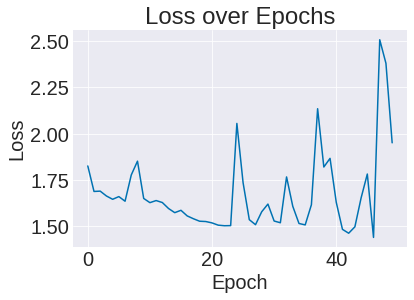

In [46]:
plt.plot(aug_hist.history['loss'])
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

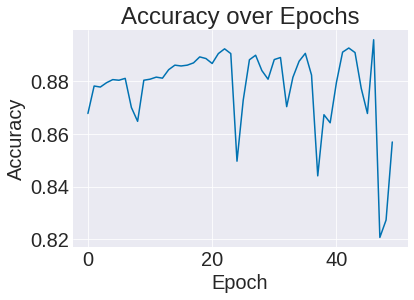

In [45]:
plt.plot(aug_hist.history['accuracy'])
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

### 2i. Questions

**Question 6:** What is the best accuracy that you are able to achieve on the test set? Briefly summarize the hyperparameters that were used in your model.

**Answer 6:** The best accuracy or 0.79 was achieved with 50 epochs, batch size of 200, and an Adam optimizer with an LR of 1e-4.
